<a href="https://colab.research.google.com/github/sujata1606/Final-Year-Project/blob/main/Review_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Ignore warnings
import warnings
warnings.simplefilter(action ="ignore", category = FutureWarning)

In [ ]:
pd.set_option('display.max_columns',None)

In [3]:
# Get the data ready
df = pd.read_csv("Electronic Products Data.csv")
df

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a products,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all 

In [ ]:
df.head()

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a products,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Timestamp                     216 non-null    object
 1   Name                          216 non-null    object
 2   Age                           216 non-null    object
 3   howoften                      216 non-null    object
 4   Changecell                    216 non-null    object
 5   Uselaptop                     216 non-null    object
 6   Readlaunches                  216 non-null    object
 7   Trynewproduct                 216 non-null    object
 8   Type                          216 non-null    object
 9   Product                       216 non-null    object
 10  Item                          216 non-null    object
 11  Brand(HomeAppliances)         216 non-null    object
 12  Brand(ITDevices)              216 non-null    object
 13  Brand(MobileDevices)

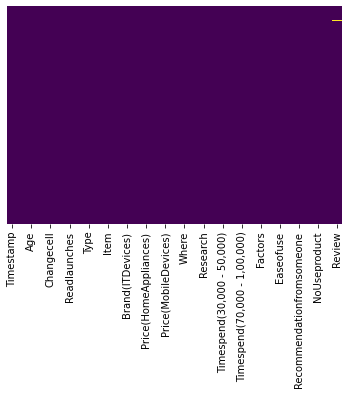

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [6]:
df=df.fillna(method='ffill')
df

,Timestamp,Name,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,NoUseproduct,Rating,Review
0,3/30/2021 15:59,Jaypriya,18-25,Occasionally,Rarely,Always,Very Often,Rarely,New,IT Devices,Laptop,LG,Lenovo,Apple,"50,000 - 60,000","40,000 - 50,000","30,000 - 40,000",During the sale,In an electronics store,No,Ask a friend/colleague/family member for their...,2 - 4 days,1-3 months,1-3 months,1-3 months,"20,000 - 40,000",Pricing of a products,Very important,Very important,Very important,Very important,Very important,Sell on as second-hand,4,Nothing
1,3/30/2021 17:20,Mahadik simran,18-25,Occasionally,Sometimes,Sometimes,Sometimes,Very Often,New,IT Devices,Smartphone,Samsung,Dell,Nokia,"40,000 - 50,000","30,000 - 40,000","60,000 - 70,000",During the sale,In the exclusive brand store,No,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"Less than 10,000",Quality of a product,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Sell on as second-hand,2,Want to purchase new
2,4/1/2021 17:17,Sahil,25-35,Regularly,Rarely,Always,Always,Rarely,Refurbished,Mobile devices,Smartphone,Whirlpool,Lenovo,OnePlus,"40,000 - 50,000","40,000 - 50,000","20,000 - 30,000",During the sale,In an electronics store,Yes,Compare them with competitive products,Less than 1 day,2 - 4 weeks,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Moderately important,Not at all important,Sell on as second-hand,4,Nothing
3,4/1/2021 17:39,Sonali,18-25,Occasionally,Sometimes,Always,Always,Sometimes,New,IT Devices,Laptop,Samsung,HP,Samsung,"20,000 - 30,000","20,000 - 30,000","100 - 10,000",During the sale,In an electronics store,Yes,Compare them with competitive products,5-10 days,2 - 4 days,2 - 4 days,Less than 1 day,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Moderately important,Not at all important,Moderately important,Sell on as second-hand,5,Its amazing
4,4/2/2021 17:39,Namrata,25-35,Regularly,Very Often,Very Often,Very Often,Very Often,New,IT Devices,Laptop,Whirlpool,HP,Nokia,"30,000 - 40,000","60,000 - 70,000","30,000 - 40,000",Without the sale (Off Season),Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 weeks,2 - 4 weeks,2 - 4 days,5-10 days,"60,000 - 80,000",Pricing of a product,Very important,Moderately important,Moderately important,Moderately important,Not at all important,Take to local recycling center,4,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,4/5/2021 17:39,Darshan,25-35,Regularly,Very Often,Always,Always,Sometimes,New,IT Devices,Desktop,Godrej,Acer,HP,"50,000 - 60,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for his o...,Less than 1 day,2 - 4 weeks,1-3 months,5-10 days,"20,000 - 40,000",Quality of a product,Moderately important,Moderately important,Very important,Not at all important,Moderately important,Take to local recycling center,3,Good
212,4/6/2021 17:39,Raj,18-25,Occasionally,Rarely,Always,Always,Rarely,Refurbished,Home appliances,Television,Samsung,Dell,OnePlus,"More than 70,000","30,000 - 40,000","40,000 - 50,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for his o...,2 - 4 days,5-10 days,2 - 4 days,5-10 days,"20,000 - 40,000",Reliability of a product,Extremely important,Moderately important,Very important,Not at all 

In [7]:
df.drop(['Timestamp','Name','NoUseproduct'],axis=1,inplace=True)

In [8]:
print(df['Review'])


0                   Nothing
1      Want to purchase new
2                   Nothing
3               Its amazing
4                      Good
               ...         
211                    Good
212           Extermly good
213                wow.....
214            Good overall
215                 Nothing
Name: Review, Length: 216, dtype: object


In [9]:
df['Review'].value_counts(ascending=True)

Totally worth it...            1
wow.....                       1
Amazing review                 1
Nice products                  1
Good overall                   1
                              ..
Thanks for taking feedback    12
Good product                  13
Nice                          14
So good                       15
Good                          45
Name: Review, Length: 73, dtype: int64

In [16]:
#nlp
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
import math

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)


In [19]:
print(df.shape)
df = df.drop_duplicates(subset=['Review'])
print(df.shape)

(216, 32)
(73, 32)


In [20]:
df['Review'].iloc[:216]

0                    Nothing
1       Want to purchase new
3                Its amazing
4                       Good
6                       Nice
               ...          
209                   Awsome
210    Not want this product
212            Extermly good
213                 wow.....
214             Good overall
Name: Review, Length: 73, dtype: object

In [14]:
print(f"type(df): {type(df)}")
print(f"type(df['Review']): {type(df['Review'])}")
print(f"type(df['Review'].iloc[195])): {type(df['Review'].iloc[len(df) - 1])}")

type(df): <class 'pandas.core.frame.DataFrame'>
type(df['Review']): <class 'pandas.core.series.Series'>
type(df['Review'].iloc[195])): <class 'str'>


In [21]:
tokenized_feedback = [ word_tokenize(feedback, 'english', True) for feedback in df['Review'] ]
print(f'len(tokenized_feedback): {len(tokenized_feedback)}')
print(f'tokenized_feedback: {tokenized_feedback}')

len(tokenized_feedback): 73
tokenized_feedback: [['Nothing'], ['Want', 'to', 'purchase', 'new'], ['Its', 'amazing'], ['Good'], ['Nice'], ['That', "'s", 'awesome'], ['So', 'good'], ['So', 'nice'], ['Nice', 'use'], ['No'], ['It', "'s", 'good..', 'working', 'properly'], ['I', 'just', 'bought', 'a', 'mobile', 'and', 'it', 'is', 'very', 'nice'], ['I', 'have', 'purchase', 'acer', 'predator', 'Helios', '300.', 'I', 'm', 'writing', 'this', 'review', 'after', '2', 'months', 'of', 'usage..', 'Amazing', 'laptop', 'with', 'Amazing', 'Specs', 'and', 'Mind', 'Blowing', 'Performance.', 'I', 'bought', 'this', 'laptop', 'for', 'Architectural', 'rendering', 'and', 'designing', 'purpose', 'and', 'I', 'do', "n't", 'think', 'that', 'there', 'is', 'any', 'other', 'laptop', 'in', 'this', 'range', 'that', 'can', 'serve', 'this', 'purpose', 'better', 'that', 'this', 'laptop', 'does', '.'], ['Good', 'product..'], ['Amazing', 'one'], ['Totally', 'worth', 'it', '...'], ['Good', 'quality'], ['Worth', 'it'], ['Good

In [22]:
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.stem import PorterStemmer

pos_feedbacks = [ pos_tag(t_feedback) for t_feedback in tokenized_feedback ]
print(f'len(pos_feedbacks): {len(pos_feedbacks)}')
print(f'pos_feedbacks: {pos_feedbacks}')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
len(pos_feedbacks): 73
pos_feedbacks: [[('Nothing', 'NN')], [('Want', 'VBP'), ('to', 'TO'), ('purchase', 'VB'), ('new', 'JJ')], [('Its', 'PRP$'), ('amazing', 'NN')], [('Good', 'JJ')], [('Nice', 'NN')], [('That', 'DT'), ("'s", 'VBZ'), ('awesome', 'JJ')], [('So', 'RB'), ('good', 'JJ')], [('So', 'RB'), ('nice', 'JJ')], [('Nice', 'NNP'), ('use', 'NN')], [('No', 'DT')], [('It', 'PRP'), ("'s", 'VBZ'), ('good..', 'JJ'), ('working', 'VBG'), ('properly', 'RB')], [('I', 'PRP'), ('just', 'RB'), ('bought', 'VBD'), ('a', 'DT'), ('mobile', 'JJ'), ('and', 'CC'), ('it', 'PRP'), ('is', 'VBZ'), ('very', 'RB'), ('nice', 'JJ')], [('I', 'PRP'), ('have', 'VBP'), ('purchase', 'VBN'), ('acer', 'NN'), ('predator', 'NN'), ('Helios', 'NNP'), ('300.', 'CD'), ('I', 'PRP'), ('m', 'VBP'), ('writing', 'VBG'), ('this', 'DT'), ('review', 'NN'), ('after', 'IN'),

In [23]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Regular Expression Python module
import re

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [24]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [25]:
df['Subjectivity'] = df['Review'].apply(getTextSubjectivity)
df['Polarity'] = df['Review'].apply(getTextPolarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.sample(5)


,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating,Review,Subjectivity,Polarity
210,18-25,Occasionally,Sometimes,Always,Sometimes,Always,New,IT Devices,Laptop,Samsung,Lenovo,Realme,"30,000 - 40,000","20,000 - 30,000","10,000 - 20,000",During the sale,Online,Yes,Read online reviews,2 - 4 days,5-10 days,1-3 months,1-3 months,"60,000 - 80,000",Quality of a product,Very important,Moderately important,Moderately important,Moderately important,Moderately important,5,Not want this product,0.00,0.00
55,35-50,Regularly,Always,Always,Always,Always,New,Home appliances,Refrigerator,Godrej,Dell,Realme,"40,000 - 50,000","20,000 - 30,000","20,000 - 30,000",During the sale,"Online, In an electronics store",Yes,Ask a friend/colleague/family member for their...,Less than 1 day,2 - 4 days,5-10 days,5-10 days,"More than 80,000","Reliability of a product, Quality of a product",Moderately important,Moderately important,Moderately important,Not at all important,Not at all important,5,Very good product,0.78,0.91
213,25-35,Regularly,Rarely,Sometimes,Always,Rarely,New,Mobile devices,Smartphone,LG,Apple,Apple,"More than 70,000","20,000 - 30,000","50,000 - 60,000",During the sale,Online,Yes,Find out brand reputation,Less than 1 day,2 - 4 weeks,3 - 4 days,Less than 1 day,"60,000 - 80,000",Services offered,Extremely important,Moderately important,Very important,Not at all important,Not at all important,4,wow.....,1.00,0.10
17,18-25,Occasionally,Very Often,Sometimes,Always,Sometimes,New,Mobile devices,Smartphone,LG,Lenovo,Xiaomi,"10,000 - 20,000","40,000 - 50,000","40,000 - 50,000",During the sale,Online,Yes,Read online reviews,Less than 1 day,Less than 1 day,5-10 days,2 - 4 weeks,"10,000 - 20,000",Quality of a product,Moderately important,Not at all important,Moderately important,Not at all important,Moderately important,5,Good product..,0.60,0.70
8,25-35,Occasionally,Always,Very Often,Sometimes,Rarely,New,IT Devices,Laptop,Wh,Dell,Moto,"50,000 - 60,000","40,000 - 50,000","100 - 10,000",During the sale,In the exclusive brand store,Yes,Find out brand reputation,Less than 1 day,2 - 4 days,5-10 days,1-3 months,"40,000 - 60,000",Pricing of a product,Not at all important,Moderately important,Moderately important,Moderately important,Moderately important,3,So good,0.60,0.70


In [ ]:
df = df.drop(df[df['Review'] == ''].index)

In [12]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [26]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.sample(5)

,Age,howoften,Changecell,Uselaptop,Readlaunches,Trynewproduct,Type,Product,Item,Brand(HomeAppliances),Brand(ITDevices),Brand(MobileDevices),Price(HomeAppliances),Price(ITDevices),Price(MobileDevices),Time,Where,Compareprices,Research,"Timespend(10,000 - 30,000)","Timespend(30,000 - 50,000)","Timespend(50,000 - 70,000)","Timespend(70,000 - 1,00,000)",Yearlyspending,Factors,Productfeatures,Easeofuse,Warranty,Recommendationfromsomeone,Salespersonrecommendation,Rating,Review,Subjectivity,Polarity,Score
213,25-35,Regularly,Rarely,Sometimes,Always,Rarely,New,Mobile devices,Smartphone,LG,Apple,Apple,"More than 70,000","20,000 - 30,000","50,000 - 60,000",During the sale,Online,Yes,Find out brand reputation,Less than 1 day,2 - 4 weeks,3 - 4 days,Less than 1 day,"60,000 - 80,000",Services offered,Extremely important,Moderately important,Very important,Not at all important,Not at all important,4,wow.....,1.000000,0.100000,Positive
32,25-35,Occasionally,Always,Very Often,Always,Always,New,"IT Devices, Mobile devices","Television, Laptop, Smartphone, Desktop",Godrej,HP,Xiaomi,"50,000 - 60,000","30,000 - 40,000","60,000 - 70,000",During the sale,"Online, In the exclusive brand store, In an el...",Yes,Ask a friend/colleague/family member for their...,5-10 days,2 - 4 days,2 - 4 days,5-10 days,"60,000 - 80,000","Reliability of a product, Services offered, Pr...",Not at all important,Moderately important,Moderately important,Not at all important,Not at all important,5,Very nice product,1.000000,0.780000,Positive
50,25-35,Occasionally,Sometimes,Rarely,Very Often,Very Often,New,Home appliances,Air conditioners,Bajaj,HP,Moto,"60,000 - 70,000","60,000 - 70,000","30,000 - 40,000",During the sale,In the exclusive brand store,Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,2 - 4 weeks,"20,000 - 40,000",Quality of a product,Moderately important,Very important,Extremely important,Moderately important,Moderately important,4,Nothing special.,0.571429,0.357143,Positive
129,25-35,Regularly,Always,Very Often,Very Often,Very Often,New,Mobile devices,Smartphone,Whirlpool,HP,OnePlus,"60,000 - 70,000","50,000 - 60,000","40,000 - 50,000",During the sale,Online,Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,2 - 4 weeks,1-3 months,"60,000 - 80,000","Reliability of a product, Quality of a product",Extremely important,Very important,Very important,Moderately important,Moderately important,4,Goos,0.000000,0.000000,Neutral
76,18-25,Regularly,Very Often,Sometimes,Very Often,Very Often,New,Mobile devices,Smartphone,Whirlpool,Lenovo,Xiaomi,"60,000 - 70,000","60,000 - 70,000","20,000 - 30,000",During the sale,"Online, In an electronics store",Yes,Ask a friend/colleague/family member for their...,2 - 4 days,5-10 days,5-10 days,5-10 days,"20,000 - 40,000","Services offered, Pricing of a product",Very important,Very important,Very important,Very important,Moderately important,5,Good one,0.600000,0.700000,Positive


In [33]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive review")

80.82191780821918 % of positive review


In [29]:
negative = df[df['Score'] == 'Negative']

print(str(negative.shape[0]/(df.shape[0])*100) + " % of negative review")

6.8493150684931505 % of negative review


In [30]:
neutral = df[df['Score'] == 'neutral']

print(str(neutral.shape[0]/(df.shape[0])*100) + " % of neutral review")

0.0 % of neutral review


In [ ]:
sns

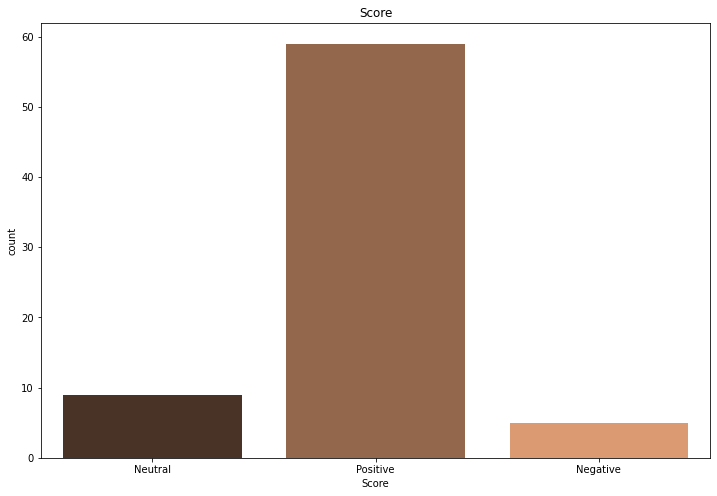

In [ ]:
sns.countplot(x='Score',data=df, palette='copper')
plt.title("Score")
plt.show()

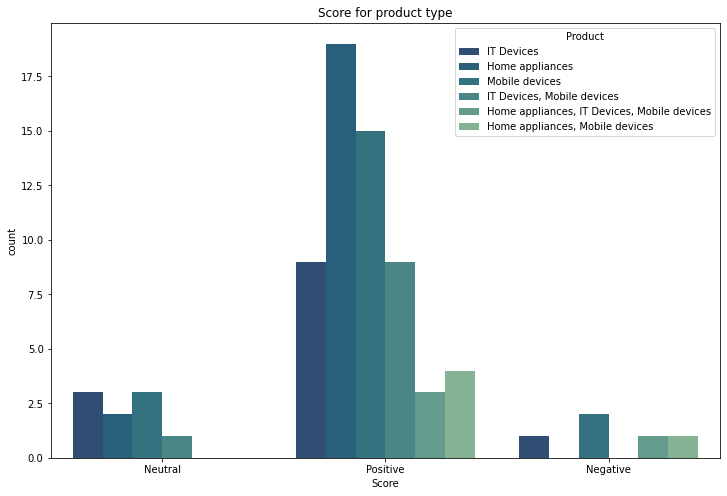

In [32]:
sns.countplot(x='Score',hue = 'Product',data=df, palette='crest_r')
plt.title("Score for product type")
plt.show()

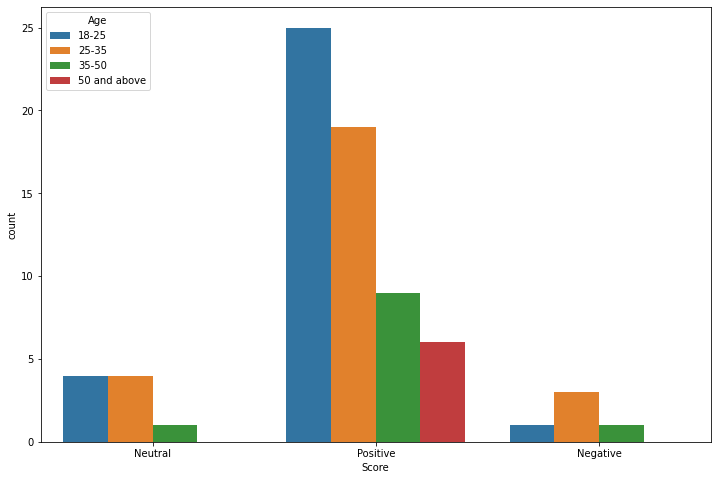

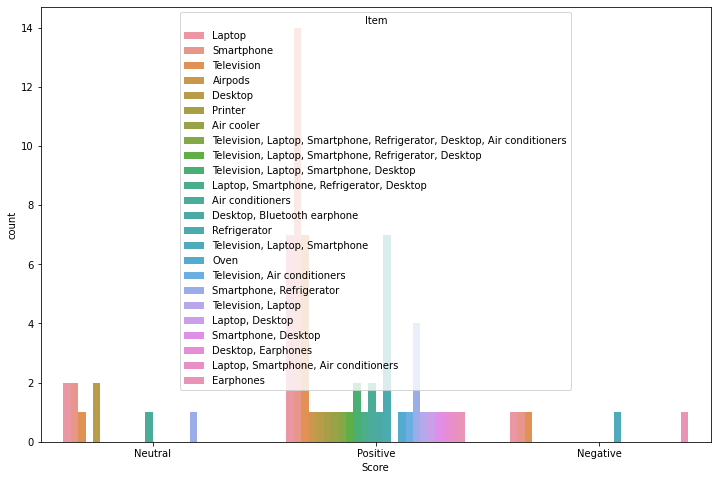

In [34]:
sns.countplot(x='Score', hue='Item',data=df)
plt.show()

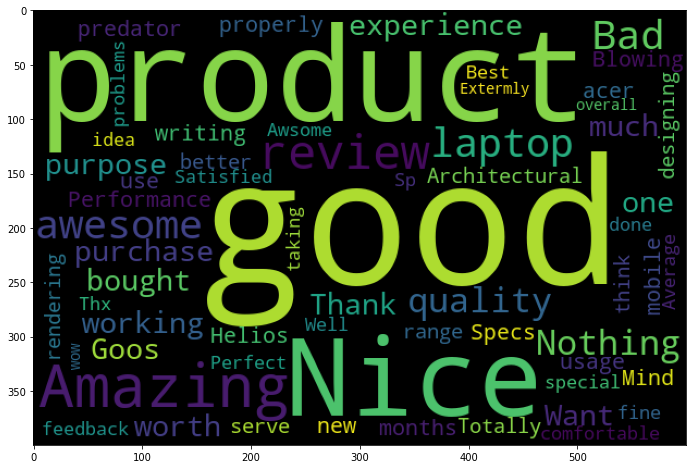

In [ ]:
# Creating a word cloud for reviews
words = ' '.join([analysis for analysis in df['Review']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()